## EDA for Natural Language Processing

Exploratory Data Analysis is a crucial stage in any Data Science project. While EDA techniques have a wide range of options when it comes to Tabular data, the same is not true for text data. There are specific methods that work for NLP problems, that lead to a productive outcome. Text Data has many forms of input and also has a different set of properties and features. And of course, with such a wide range of use cases, there's always a unique way of analysis.

We will look at some fundamental EDA techniques for text data:
* **Counts and Lengths**: Count of words and sentences, their length and average length
* **Term Frequency Analysis**: Most frequently occuring words and n_grams

For demonstration, we will use the Trip Advisor Hotel Reviews

## Setup

This code import several libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

This code block imports warnings and filters them out to avoid cluttering the output. It also downloads the Open Multilingual Wordnet-1.4 using nltk's download function and sets some default styling and font size parameters for the matplotlib plots that will be created later.






In [2]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

## Loading the Data

This code block read data from csv file and print first 10 rows of dataframe

In [3]:
data = pd.read_csv('data.csv')
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


Now that we have our data, we can begin with the EDA.<br>**But first**, we need to transform the 'Rating' column to binary labels

This code will count the number of occurrences of each unique value in the 'Rating' column of the 'data' dataset

In [4]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

This is a function that takes a rating value and returns "Positive" if the rating is between 4 and 5 inclusive, or "Negative" if it is between 1 and 3 inclusive.






In [5]:
# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

This code applies the ratings() function to the Rating column of the data dataframe, which maps ratings from 1 to 3 to "Negative" and ratings from 4 to 5 to "Positive". Then it creates a pie chart showing the percentage of positive and negative ratings in the data.






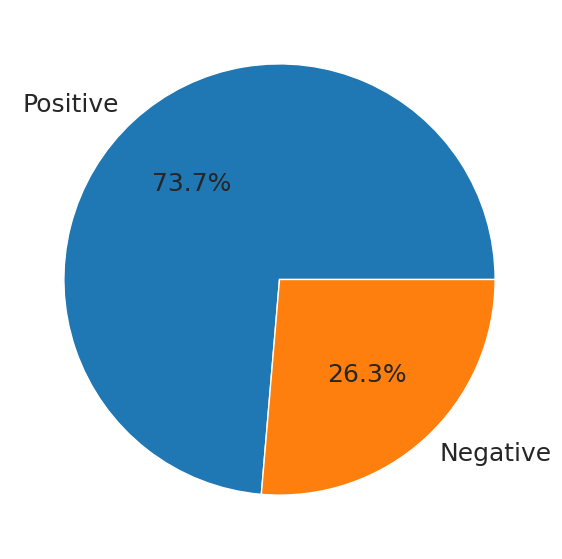

In [6]:
data['Rating'] = data['Rating'].apply(ratings)
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()

## Exploratory Data Analysis
 
### Counts and Lenght:
Start by checking how long the reviews are
* Character count
* Word count
* Mean word length
* Mean sentence length

this code count and print length of a sample review

In [7]:
lenght = len(data['Review'][0])
print(f'Length of a sample review: {lenght}')

Length of a sample review: 593


This code creates a new column 'Length' in the dataframe 'data' containing the number of characters in each review, and displays the first 10 rows of the updated dataframe using the .head() method.






In [8]:
data['Length'] = data['Review'].str.len()
data.head(10)

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281
5,love monaco staff husband stayed hotel crazy w...,Positive,1002
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748
7,"excellent staff, housekeeping quality hotel ch...",Positive,597
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419
9,excellent stayed hotel monaco past w/e delight...,Positive,271


#### **Word Count**: Number of words in a review

This code block counts the number of words in the first review of the dataset and prints the result.






In [9]:
word_count = data['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


This code defines a function named word_count that takes a review string as input, splits it into a list of words, and returns the length of the list

In [10]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

This code block adds a new column 'Word_count' to the DataFrame 'data'. The column contains the word count of each review in the 'Review' column, which is calculated using the 'word_count' function

In [11]:
data['Word_count'] = data['Review'].apply(word_count)
data.head(10)

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,134
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,101
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,85
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,59
9,excellent stayed hotel monaco past w/e delight...,Positive,271,35


#### **Mean word length**: Average length of words

This code block calculates the mean word length for each review in the 'Review' column of the dataframe 'data' using a lambda function to split each review into individual words and then calculates the average length of each word. The resulting mean word lengths are added to a new column in the dataframe called 'mean_word_length'.






In [12]:
data['mean_word_length'] = data['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,134,6.470149
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,101,6.396040
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,85,6.011765
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,59,6.084746
9,excellent stayed hotel monaco past w/e delight...,Positive,271,35,6.714286


#### **Mean sentence length**: Average length of the sentences in the review

This code downloads the "punkt" tokenizer from the Natural Language Toolkit (nltk) library. The "punkt" tokenizer is used to tokenize words from text data.






In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

This code computes the mean sentence length in the first review in the dataset. It tokenizes the review into sentences using the sent_tokenize function from the NLTK library and then calculates the length of each sentence using a list comprehension. The np.mean function is then used to compute the mean of these sentence lengths.






In [14]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['Review'][0])])

591.0

This code calculates the mean length of sentences for each review in the 'Review' column of the dataframe 'data', and adds the result to a new column named 'mean_sent_length'. The 'nltk.tokenize.sent_tokenize()' function is used to split each review into sentences.






In [15]:
data['mean_sent_length'] = data['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,Review,Rating,Length,Word_count,mean_word_length,mean_sent_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598,591.0
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000,1687.0
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429,712.0
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337,598.0
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571,1279.0
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,134,6.470149,1000.0
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,101,6.396040,746.0
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,85,6.011765,595.0
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,59,6.084746,417.0
9,excellent stayed hotel monaco past w/e delight...,Positive,271,35,6.714286,269.0


This code defines a function visualize which takes a column name as input and generates a box plot and a kernel density plot of the column's distribution with respect to the Rating variable using the seaborn library. The box plot is generated in the first subplot and the kernel density plot is generated in the second subplot of a matplotlib figure.





In [16]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=data[col], hue=data['Rating'])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    # sns.kdeplot(data[col], hue=data['Rating'])
    sns.displot(data=data, x=col, hue=data['Rating'], kind="kde")
    plt.legend(data['Rating'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

This code loops through all the columns in the data DataFrame starting from the third column, and calls the visualize() function for each column to generate a visualization of the column's distribution with respect to the Rating variable.





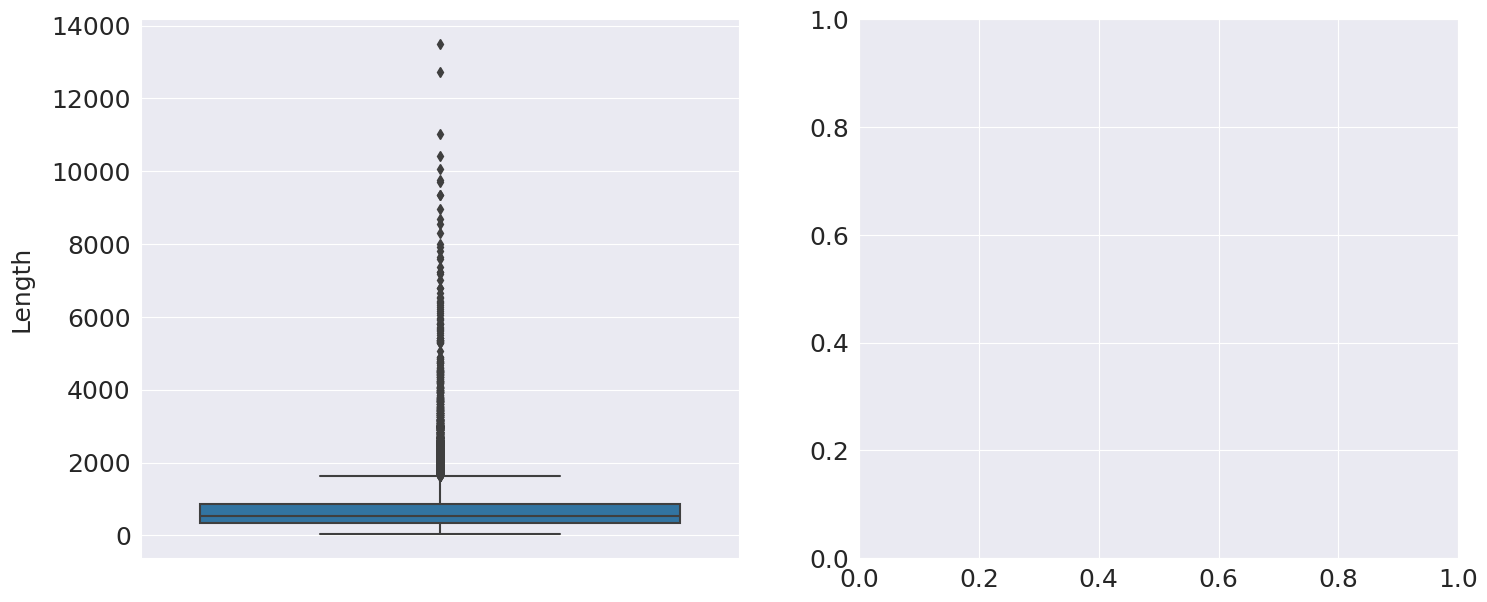

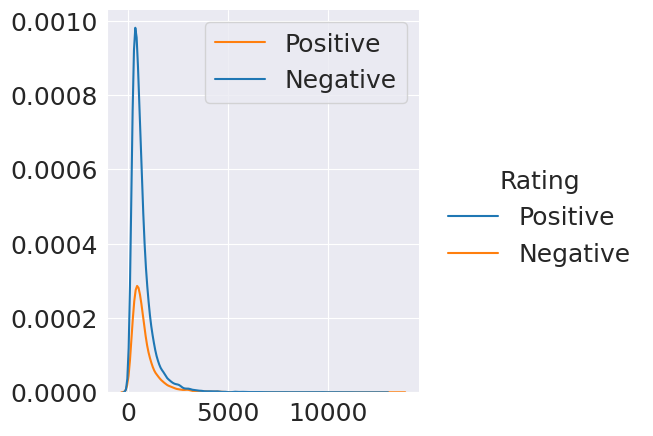

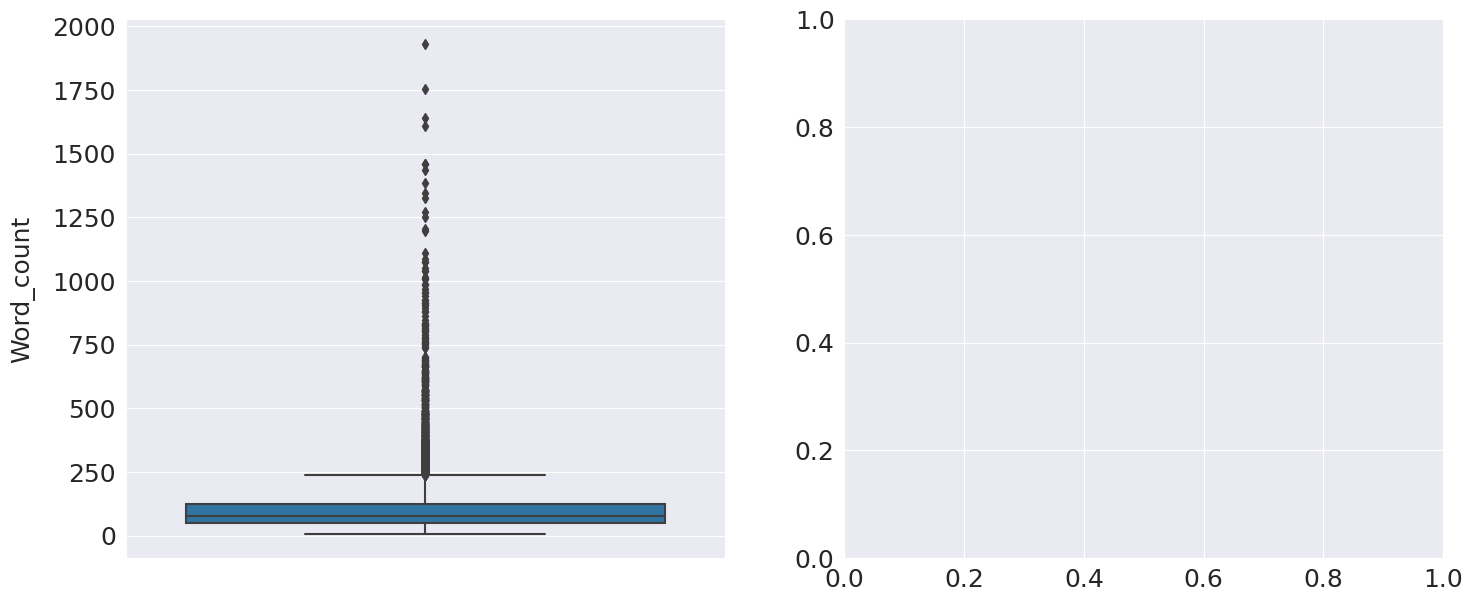

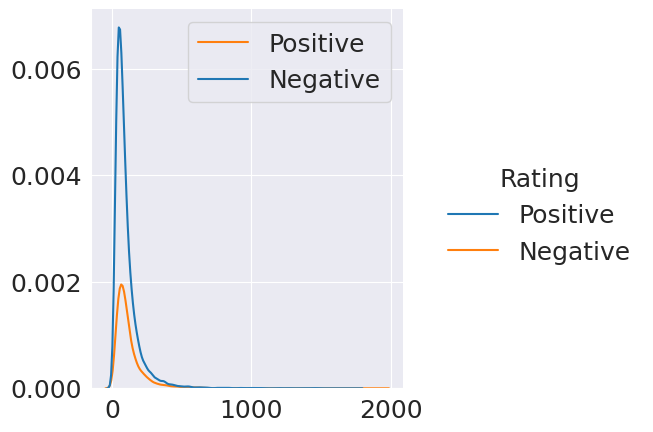

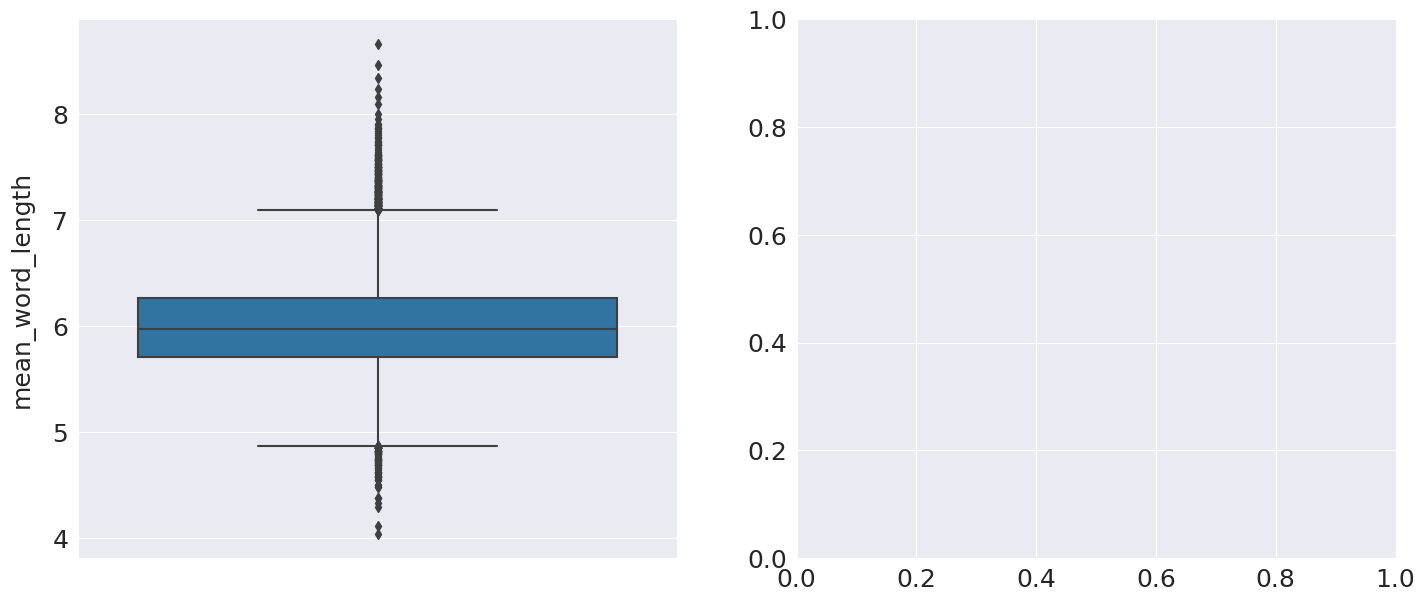

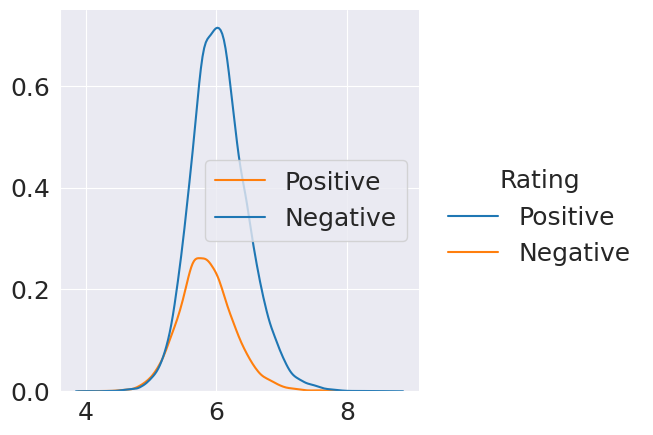

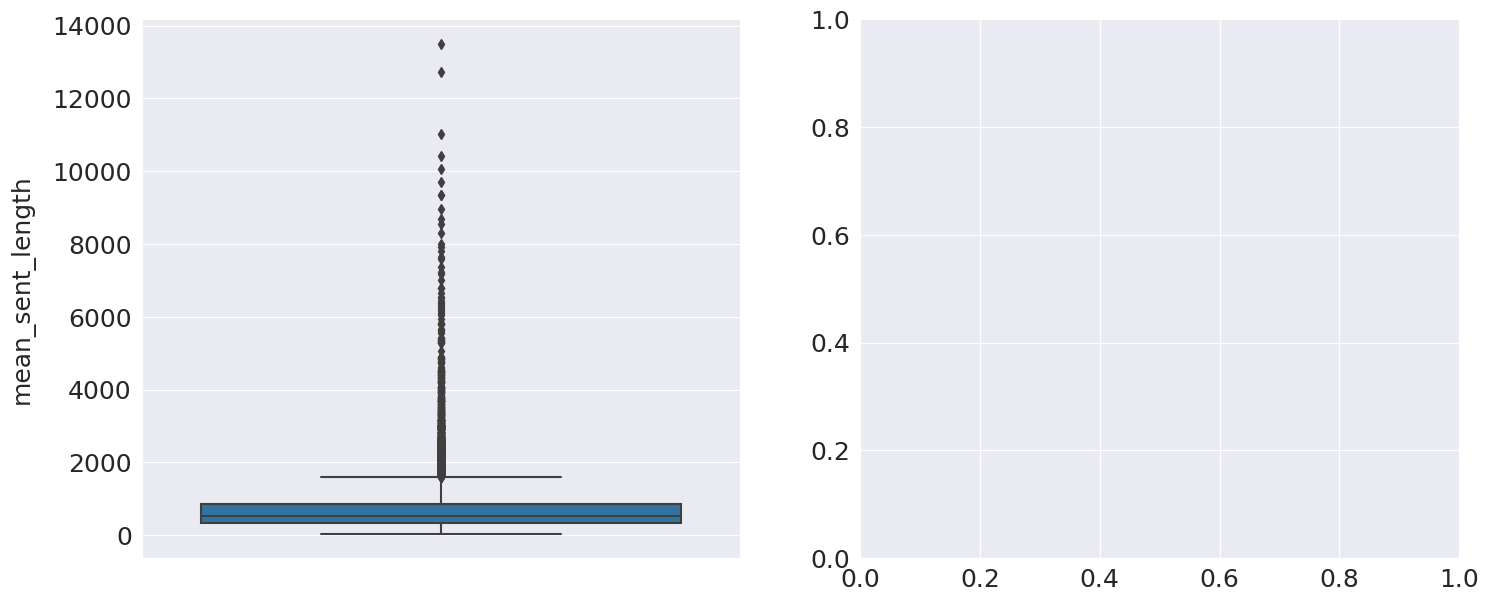

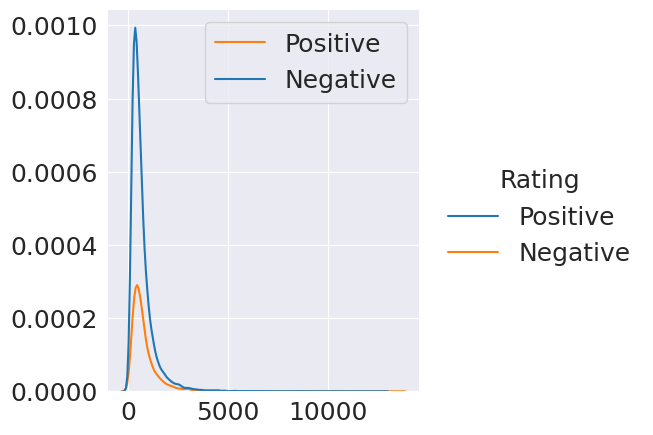

In [17]:
features = data.columns.tolist()[2:]
for feature in features:
    visualize(feature)

## Term Frequency Analysis
Examining the most frequently occuring words is one of the most popular systems of Text analytics. For example, in a sentiment analysis problem, a positive text is bound to have words like 'good', 'great', 'nice', etc. more in number than other words that imply otherwise.

*Note*: Term Frequencies are more than counts and lenghts, so the first requirement is to preprocess the text

This code drops columns whose names are stored in the features list from the data dataframe and assigns the resulting dataframe to df. The resulting dataframe df has the same columns as data except for the dropped columns. head() is then called on df to display the first few rows of the resulting dataframe.






In [18]:
df = data.drop(features, axis=1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Negative
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive


This code print information of data frame

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


There is no missing data, therefore, we can move to the next stage. For Term frequency analysis, it is essential that the text data be preprocessed.
* Lowercase
* Remove punctutations
* Stopword removal

This is a function that takes in a review and performs several cleaning steps on it, including lowercasing, removing non-alphanumeric characters, and removing stopwords in English.






In [20]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

This code downloads the "stopwords" tokenizer from the Natural Language Toolkit (nltk) library. The "stopwords" tokenizer is used to tokenize words from text data.






In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The code block above applies the clean() function to each review in the df DataFrame. The function first makes all the letters lowercase and removes any character that is not a letter, digit, space, or hyphen. Then, it splits the review into individual words and removes any stop words from it using the stopwords package from the nltk library.

In [22]:
df['Review'] = df['Review'].apply(clean)
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms 4 experience hotel monaco seattle g...,Negative
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive
5,love monaco staff husband stayed hotel crazy w...,Positive
6,cozy stay rainy city husband spent 7 nights mo...,Positive
7,excellent staff housekeeping quality hotel cho...,Positive
8,hotel stayed hotel monaco cruise rooms generou...,Positive
9,excellent stayed hotel monaco past delight rec...,Positive


This code print the first sample of the Review feature

In [23]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

The corpus function splits a string of text into a list of words.






In [24]:
def corpus(text):
    text_list = text.split()
    return text_list

This code is creating a new column 'Review_lists' in the dataframe 'df' that contains the review text converted into a list of individual words for each row. It uses the 'corpus' function to split each review into a list of words.






In [25]:
df['Review_lists'] = df['Review'].apply(corpus)
df.head(10)

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,Negative,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,Positive,"[love, monaco, staff, husband, stayed, hotel, ..."
6,cozy stay rainy city husband spent 7 nights mo...,Positive,"[cozy, stay, rainy, city, husband, spent, 7, n..."
7,excellent staff housekeeping quality hotel cho...,Positive,"[excellent, staff, housekeeping, quality, hote..."
8,hotel stayed hotel monaco cruise rooms generou...,Positive,"[hotel, stayed, hotel, monaco, cruise, rooms, ..."
9,excellent stayed hotel monaco past delight rec...,Positive,"[excellent, stayed, hotel, monaco, past, delig..."


This code creates an empty list called corpus and then loops through each row of the DataFrame df. For each row, it extracts the value of the 'Review_lists' column (which is a list of words for the given review), and adds this list of words to the corpus list. The loop also includes a progress bar (using the tqdm library) to track the progress of the loop. Finally, the code prints the length of the corpus list, which represents the total number of words in all reviews in the DataFrame.






In [26]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 74595.55it/s]


2060911

This code block uses the Counter module from the collections library to count the occurrences of each word in the 'corpus' list and returns the 10 most common words and their frequency as a list of tuples.






In [27]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 48844),
 ('room', 34279),
 ('great', 21068),
 ('nt', 18989),
 ('good', 16953),
 ('staff', 16193),
 ('stay', 15142),
 ('nice', 12393),
 ('rooms', 12005),
 ('location', 11009)]

This code creates two empty lists words and freq. It then iterates over the mostCommon list of tuples (word, count), and appends the word to the words list and the count to the freq list. This is done to separate the words and their frequencies for further processing.






In [28]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

This code block is creating a bar plot using Seaborn library to visualize the frequency of top 10 most commonly occurring words in the cleaned text corpus.






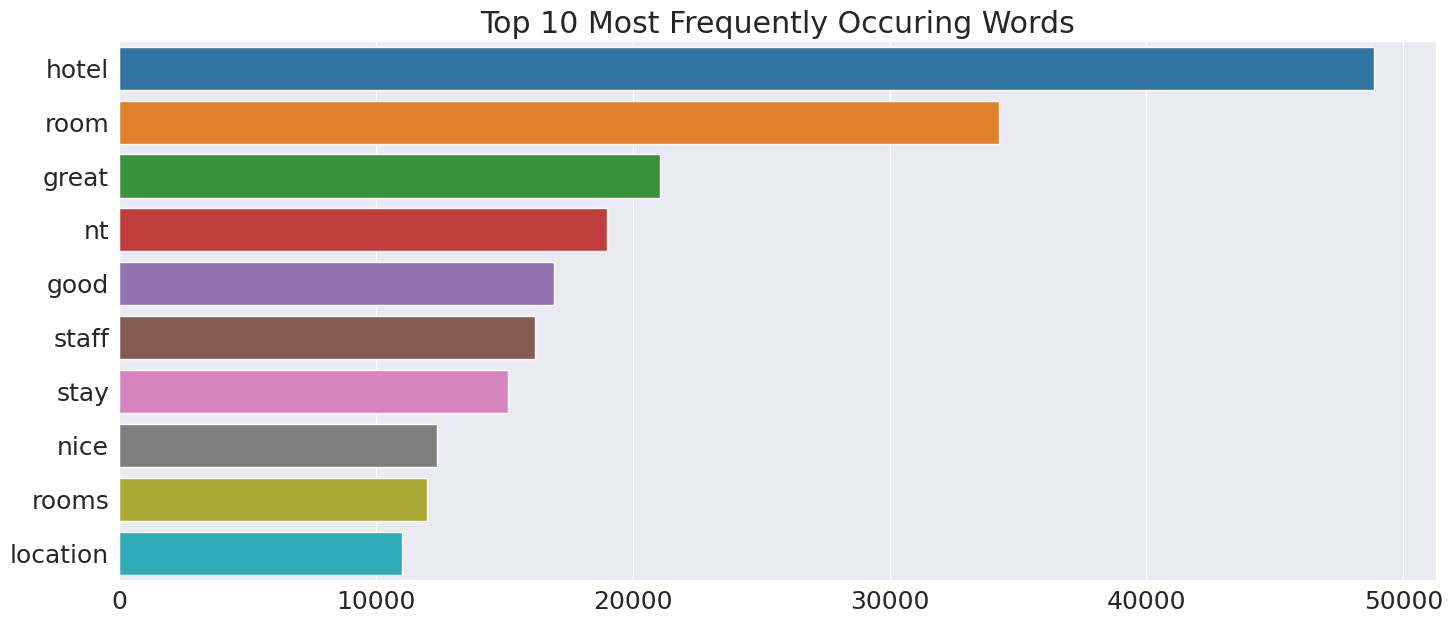

In [29]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

## Most Frequently occuring N_grams

**What is an N-gram?** <br>
An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.
<br>
> A **Bi-gram** means two words in a sequence. 'Very good' or 'Too great'<br>
> A **Tri-gram** means three words in a sequence. 'How was your day' would be broken down to 'How was your' and 'was your day'.<br>

For separating text into n-grams, we will use `CountVectorizer` from Sklearn

This code block creates a count vectorizer with ngram range of 2 to 2 and then applies it to the preprocessed reviews in the DataFrame to extract bigrams.






In [30]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Review'])

This code block computes the frequency of each bigram in the dataset by first summing up the occurrence of each bigram in all the reviews using bigrams.toarray().sum(axis=0). Then, it sorts the frequency values in descending order and stores them in a Pandas DataFrame called ngram_freq, with two columns: "frequency" and "ngram". The "ngram" column contains the bigrams and the "frequency" column contains the number of times each bigram appears in the dataset.






In [31]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

This code plot the bar chart of Top 10 Most Frequently Occuring Bigrams



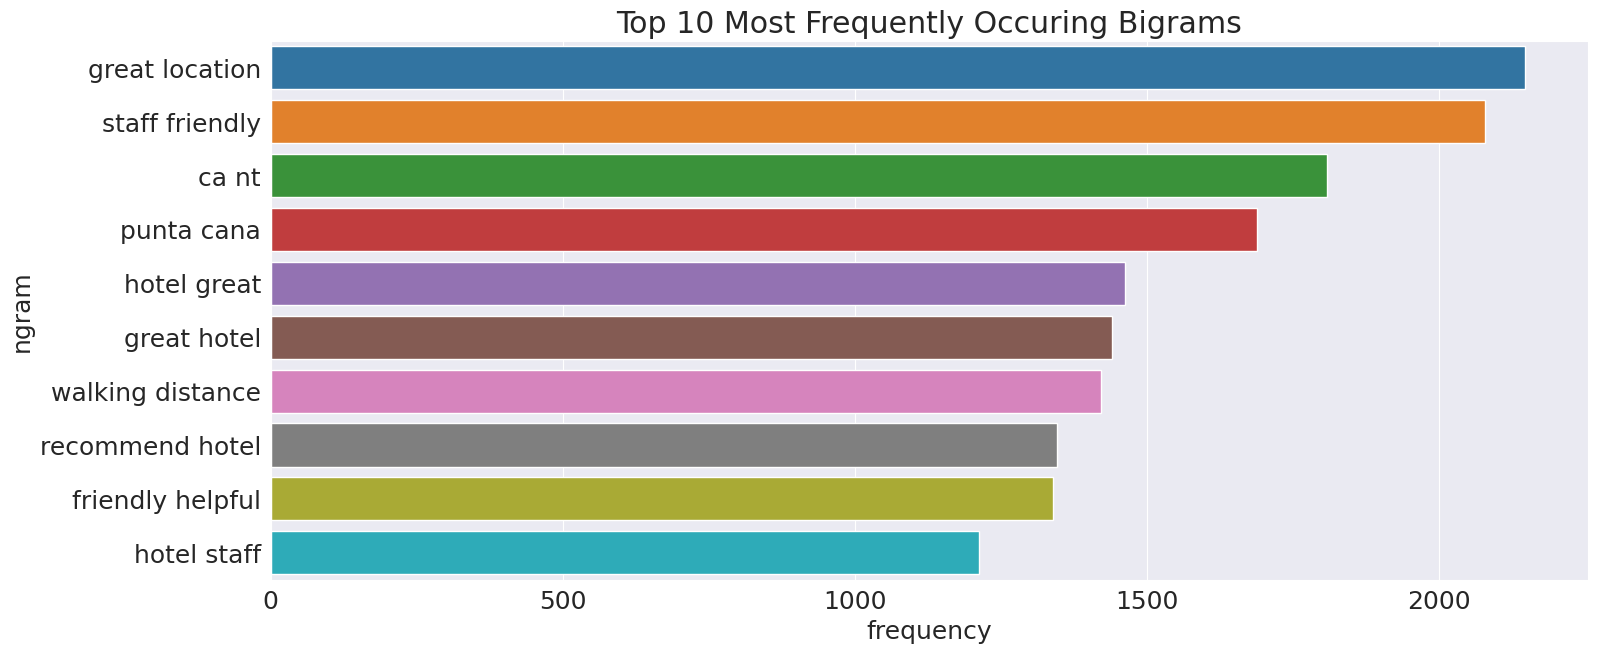

In [32]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

This code block creates a CountVectorizer object with the ngram_range parameter set to (3,3) to extract trigrams from the preprocessed reviews. It then fits and transforms the reviews using this vectorizer and counts the frequency of each trigram in the corpus. A DataFrame is then created from this count data and sorted by frequency, and the top 10 most frequently occurring trigrams are displayed using a bar plot.






In [33]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Review'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

This code plot the bar chart of Top 10 Most Frequently Occuring Trigrams


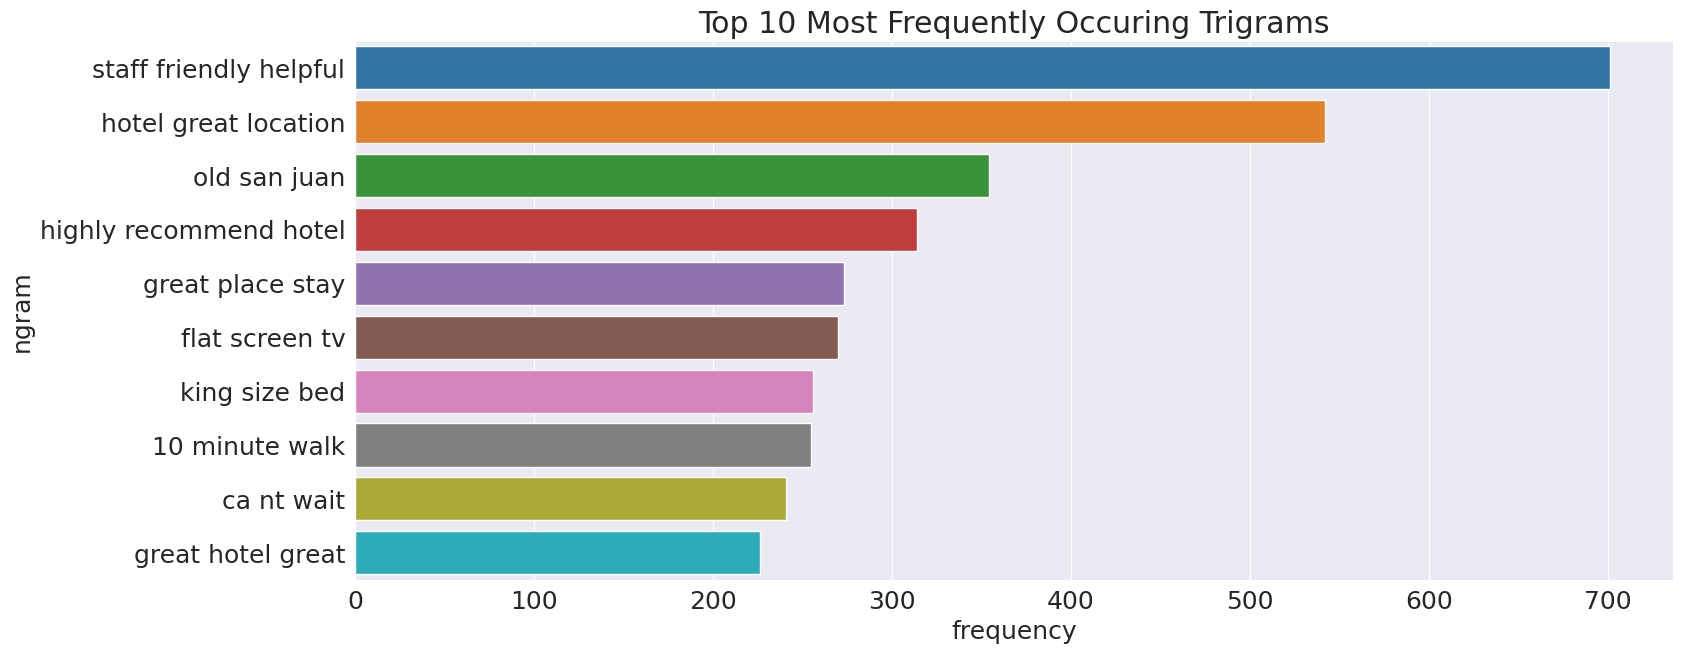

In [34]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()